In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

### Loading the Dataset

In [3]:
df=pd.read_csv("Quikr Price Prediction.csv")
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
#EDA
df.shape

(892, 6)

In [5]:
#Info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
#Missing Value
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [7]:
#duplicates
df[df.duplicated()]

,name,company,year,Price,kms_driven,fuel_type
14,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
15,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
20,Mahindra Scorpio S10,Mahindra,2016,"3,50,000","43,000 kms",Diesel
24,Hyundai i20 Sportz 1.2,Hyundai,2012,"1,00,000","55,000 kms",Petrol
25,Hyundai i20 Sportz 1.2,Hyundai,2012,"1,00,000","55,000 kms",Petrol
...,...,...,...,...,...,...
626,Tata Sumo Gold EX BS IV,Tata,2012,"2,10,000","75,000 kms",Diesel
641,Maruti Suzuki Swift VDi BS IV,Maruti,2012,"2,80,000","48,006 kms",Diesel
727,Mahindra Scorpio S4,Mahindra,2015,"8,65,000","30,000 kms",Diesel
861,Hyundai Getz Prime 1.3 GLX,Hyundai,2009,"1,15,000","20,000 kms",Petrol


In [8]:
#Removing duplicates
df.drop_duplicates(inplace=True,ignore_index=True)

In [9]:
df.shape[0] - 798

0

In [10]:
df1=df.copy()

In [11]:
df.shape

(798, 6)

In [12]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [13]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [14]:
df.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [15]:
df[df.year.str.isnumeric()]

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
792,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
794,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
795,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
796,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [16]:
df[~df.year.str.isnumeric()]

,name,company,year,Price,kms_driven,fuel_type
156,"Commercial , DZire LDI, 2016, for sale",Commercial,...,Ask For Price,NaN,NaN
163,"Tata indigo ecs LX, 201",Tata,150k,"1,50,000",NaN,NaN
174,MARUTI SUZUKI DESI,MARUTI,TOUR,"4,00,000",NaN,NaN
235,Yama,Yamaha,r 15,"55,000",NaN,NaN
290,selling car Ta,selling,Zest,Ask For Price,NaN,NaN
296,Tata Zest 90,Tata,/-Rs,Ask For Price,NaN,NaN
307,Maruti Suzuki Swift Dzire car,Maruti,sale,"3,00,000",NaN,NaN
315,Maruti Suzuki Swift Dzire Tour (Gat,Maruti,ara),"3,00,000",NaN,NaN
321,URJE,URJENT,SELL,"1,80,000",NaN,NaN
333,Swift Dzire Tour 27 Dec 2016 Regis,Swift,tion,"3,70,000",NaN,NaN


In [17]:
df[~df.year.str.isnumeric()].shape

(49, 6)

In [18]:
49/df.shape[0]*100

6.140350877192982

In [19]:
df = df[df.year.str.isnumeric()]

In [20]:
df.reset_index(drop = True,inplace= True)

In [21]:
df['year'] = df.year.astype(int)

In [22]:
df.year.nunique()

21

In [23]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print(f"{i} is in ",df[i].dtypes)
    print(df[i].nunique())
    print("--"*30)

name
['Hyundai Santro Xing XO eRLX Euro III' 'Mahindra Jeep CL550 MDI'
 'Maruti Suzuki Alto 800 Vxi' 'Hyundai Grand i10 Magna 1.2 Kappa VTVT'
 'Ford EcoSport Titanium 1.5L TDCi' 'Ford Figo' 'Hyundai Eon'
 'Ford EcoSport Ambiente 1.5L TDCi' 'Maruti Suzuki Alto K10 VXi AMT'
 'Skoda Fabia Classic 1.2 MPI' 'Maruti Suzuki Stingray VXi'
 'Hyundai Elite i20 Magna 1.2' 'Mahindra Scorpio SLE BS IV' 'Audi A8'
 'Audi Q7' 'Mahindra Scorpio S10' 'Maruti Suzuki Alto 800'
 'Hyundai i20 Sportz 1.2' 'Maruti Suzuki Alto 800 Lx'
 'Maruti Suzuki Vitara Brezza ZDi' 'Maruti Suzuki Alto LX'
 'Mahindra Bolero DI' 'Maruti Suzuki Swift Dzire ZDi'
 'Mahindra Scorpio S10 4WD' 'Maruti Suzuki Swift Vdi BSIII'
 'Maruti Suzuki Wagon R VXi BS III' 'Maruti Suzuki Wagon R VXi Minor'
 'Toyota Innova 2.0 G 8 STR BS IV' 'Renault Lodgy 85 PS RXL'
 'Skoda Yeti Ambition 2.0 TDI CR 4x2' 'Maruti Suzuki Baleno Delta 1.2'
 'Renault Duster 110 PS RxZ Diesel Plus' 'Renault Duster 85 PS RxE Diesel'
 'Honda City 1.5 S MT' 'Maruti Suz

Observations:

1. Name may not be the good features for analysis. So we can drop it
2. The Price Feature is in Object Datatype needs additional Treatment. where we want to replace "Ask For Price" and then remove ","
3. The Kms_driven feature requires additional treatment where it is in object datatype, where you need to remove KMS, and remove Petrol and remove ","
4. Try to impute the missing information in the Fuel_type column

In [25]:
df.year.dtypes

dtype('int64')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        749 non-null    object
 1   company     749 non-null    object
 2   year        749 non-null    int64 
 3   Price       749 non-null    object
 4   kms_driven  748 non-null    object
 5   fuel_type   745 non-null    object
dtypes: int64(1), object(5)
memory usage: 35.2+ KB


In [27]:
df[df.kms_driven == "Petrol"]

,name,company,year,Price,kms_driven,fuel_type
747,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
748,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


In [28]:
df.loc[747:749,"fuel_type"] = "Petrol"

In [29]:
df[df.kms_driven == "Petrol"]

,name,company,year,Price,kms_driven,fuel_type
747,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,Petrol
748,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,Petrol


In [30]:
df.kms_driven.replace({"Petrol":np.nan},inplace = True)

In [31]:
df['kms_driven'] = df.kms_driven.str.split().str.get(0).str.replace(",","")

In [32]:
int('45,000 kms'.split()[0].replace(",",""))

45000

<Axes: xlabel='kms_driven'>

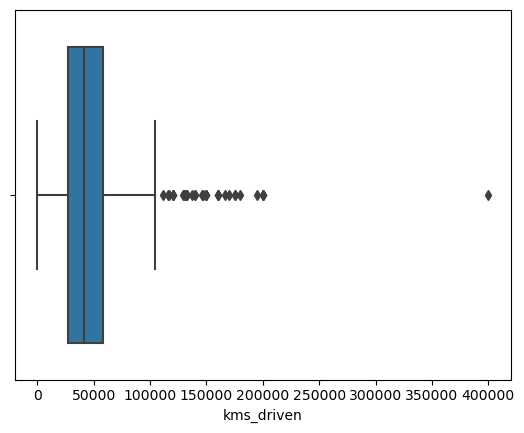

In [33]:
sns.boxplot(x = df.kms_driven.astype(float))

In [34]:
df.kms_driven.astype(float).max()

400000.0

In [35]:
df.kms_driven.astype(float).median()

41000.0

In [36]:
df.kms_driven.astype(float).mean()

46478.470509383376

In [37]:
df.kms_driven.fillna(df.kms_driven.astype(float).median(),inplace= True)

In [38]:
df["kms_driven"] = df.kms_driven.astype(int)

In [39]:
df.dtypes

name          object
company       object
year           int64
Price         object
kms_driven     int64
fuel_type     object
dtype: object

In [40]:
df.fuel_type.mode()[0]

'Petrol'

In [41]:
df.fuel_type.fillna(df.fuel_type.mode()[0],inplace = True)

In [42]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [43]:
df.dtypes

name          object
company       object
year           int64
Price         object
kms_driven     int64
fuel_type     object
dtype: object

In [44]:
# Price Features

df.Price.str.isnumeric()

0      False
1      False
2      False
3      False
4      False
       ...  
744    False
745    False
746    False
747    False
748    False
Name: Price, Length: 749, dtype: bool

In [45]:
df["Price"] = df.Price.str.replace(",","")

In [46]:
df1 = df[df.Price.str.isnumeric()]
df1.reset_index(drop = True,inplace = True)

In [47]:
df1["Price"] = df1.Price.astype(int)

In [48]:
df1

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
722,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
723,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel
724,Mahindra Quanto C8,Mahindra,2013,390000,40000,Diesel
725,Honda Amaze 1.2 E i VTEC,Honda,2014,180000,41000,Petrol


In [49]:
df1.Price.describe()

count    7.270000e+02
mean     4.024270e+05
std      4.794797e+05
min      3.000000e+04
25%      1.650000e+05
50%      2.900000e+05
75%      4.899990e+05
max      8.500003e+06
Name: Price, dtype: float64

In [50]:
df1[df1.Price == df1.Price.max()]

,name,company,year,Price,kms_driven,fuel_type
448,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [51]:
df1.Price.replace(8500003,850000,inplace = True)

In [52]:
df1.Price.max()

3100000

In [53]:
df1[df1.Price == df1.Price.max()]

,name,company,year,Price,kms_driven,fuel_type
590,Audi A3 Cabriolet 40 TFSI,Audi,2015,3100000,12516,Petrol


<Axes: xlabel='Price'>

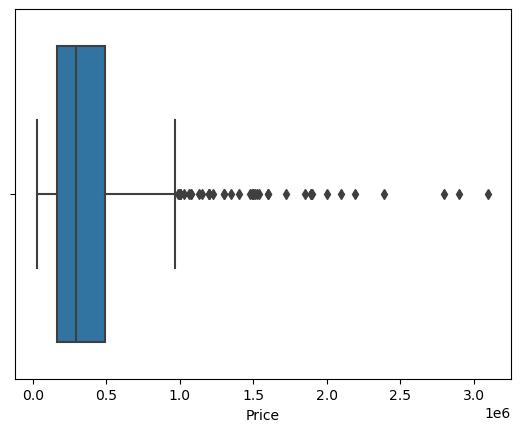

In [54]:
sns.boxplot(x = df1.Price)

In [55]:
a = df1.groupby("company")["Price"].mean().reset_index().sort_values("Price",ascending = False)

In [56]:
b = df1.company.value_counts().reset_index()
b

,company,count
0,Maruti,202
1,Hyundai,129
2,Mahindra,78
3,Tata,61
4,Honda,52
5,Toyota,35
6,Chevrolet,34
7,Ford,26
8,Renault,26
9,Volkswagen,17


In [57]:
pd.merge(a,b,on = "company")

,company,Price,count
0,Jaguar,2.495000e+06,2
1,Land,2.100000e+06,1
2,Mini,1.891111e+06,3
3,Volvo,1.850000e+06,1
4,Audi,1.554700e+06,10
5,Mitsubishi,1.263000e+06,5
6,Mercedes,1.170667e+06,6
7,BMW,1.049875e+06,8
8,Jeep,9.500000e+05,1
9,Force,5.650000e+05,2


In [58]:
df1.Price.median()

290000.0

In [59]:
df1[df1.Price == 30000]

,name,company,year,Price,kms_driven,fuel_type
297,Maruti Suzuki Maruti 800 Std – Befo,Maruti,1995,30000,55000,Petrol
693,Maruti Suzuki 800 Std BS III,Maruti,2000,30000,33400,Petrol


In [60]:
df[~df.Price.str.isnumeric()]

,name,company,year,Price,kms_driven,fuel_type
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,22000,Petrol
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,59000,Diesel
51,I want to sell my car Tata Zest,I,2017,Ask For Price,41000,Petrol
115,Maruti Suzuki Alto 800 Lxi,Maruti,2018,Ask For Price,28028,Petrol
232,Maruti Suzuki Swift LDi,Maruti,2010,Ask For Price,52000,Diesel
238,Tata Indica eV2 LS,Tata,2017,Ask For Price,84000,Diesel
303,Maruti Suzuki Alto 800 Lxi,Maruti,2018,Ask For Price,24000,Petrol
355,Maruti Suzuki Zen Estilo LXI Green CNG,Maruti,2011,Ask For Price,16000,Petrol
401,Hyundai Xcent Base 1.1 CRDi,Hyundai,2015,Ask For Price,180000,Diesel
409,Hyundai Xcent S 1.2,Hyundai,2015,Ask For Price,35000,Petrol


In [61]:
df.kms_driven.median()

41000.0

In [62]:
df.fuel_type.value_counts()

fuel_type
Petrol    406
Diesel    341
LPG         2
Name: count, dtype: int64

In [63]:
df.fuel_type.value_counts(normalize = True) * 100

fuel_type
Petrol    54.205607
Diesel    45.527370
LPG        0.267023
Name: proportion, dtype: float64

In [64]:
df[df.kms_driven == "400000"]

,name,company,year,Price,kms_driven,fuel_type


In [65]:
a = pd.DataFrame({"Marks":["T1","T1","T2","T3","T2"]})
a

,Marks
0,T1
1,T1
2,T2
3,T3
4,T2


In [66]:
a.Marks.mode()

0    T1
1    T2
Name: Marks, dtype: object

ValueError: could not convert string to float: 'T1'

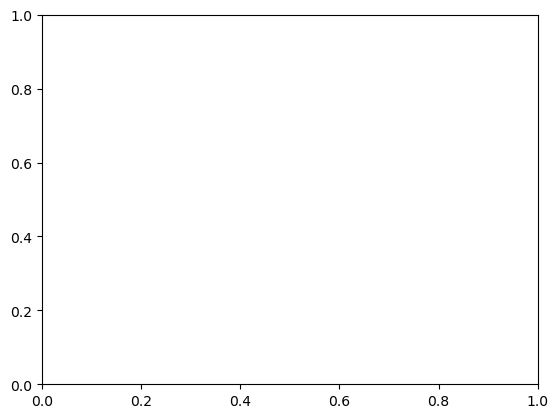

In [67]:
sns.distplot(a.Marks)

In [ ]:
sns.boxplot(x = a.Marks)

In [68]:
final_df=pd.get_dummies(df1,drop_first=True).astype(int)

In [100]:
X = final_df.drop("Price", axis = 1)
y = final_df.Price

In [106]:
# Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state = 0)

In [94]:
X.shape[0] * 0.8

581.6

In [96]:
X.shape[0] * 0.2

145.4

In [104]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((581, 492), (146, 492), (581,), (146,))

In [108]:
X_train

,year,kms_driven,name_Audi A4 1.8 TFSI Multitronic Premium Plus,name_Audi A4 2.0 TDI 177bhp Premium,name_Audi A6 2.0 TDI Premium,name_Audi A8,name_Audi Q3 2.0 TDI quattro Premium,name_Audi Q5 2.0 TDI quattro Premium Plus,name_Audi Q7,name_BMW 3 Series 320d Sedan,...,company_Mitsubishi,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,fuel_type_LPG,fuel_type_Petrol
494,2014,200000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
478,2015,43000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243,2009,65000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
17,2015,39000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
271,2015,35000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,2016,104000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
192,2014,35000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
629,2006,32000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
559,2014,7400,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [110]:
# Building my model
from sklearn.linear_model import LinearRegression

In [118]:
# Inistailising the model
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [120]:
model1.predict(X_train)

array([ 159999.99210036,  399999.88886475,  259928.04706787,
        147351.8380835 ,  574998.99091553,  549072.26436691,
       1641588.90907055,  475000.1311438 ,  380999.99485537,
        264575.94014816,  289999.26874756,  444999.08075928,
         44999.95624756,   85000.16230225,   85000.05585694,
        928359.42743897, 1545065.47661302,  159107.94843506,
        424999.96720028,  465261.74944519,  238182.4787085 ,
        500000.04560303,   84999.86754713,  240445.35761475,
        180000.10174319,  408018.12470459,  832302.9353691 ,
        210000.00365843,   95000.04245646,  550000.00840551,
        290000.00800537,  367695.83728952,  214999.91913819,
        170890.64570069,  151642.4005835 ,  276771.14185349,
       1299000.02851319,  338558.78437256,  299999.91701347,
        234676.0670874 ,  698999.98945069,  124560.16777905,
        353594.11296624,  600000.04863541,  472241.55040675,
        140000.08320069,  127271.4317359 ,  420780.52551749,
        124999.98377228,

In [126]:
aish = pd.DataFrame(y_train)
aish

,Price
494,160000
478,400000
243,199999
17,75000
271,574999
...,...
707,160000
192,390000
629,71000
559,800000


In [130]:
aish["Prediction"] = model1.predict(X_train)

In [132]:
aish

,Price,Prediction
494,160000,159999.992100
478,400000,399999.888865
243,199999,259928.047068
17,75000,147351.838083
271,574999,574998.990916
...,...,...
707,160000,194999.975038
192,390000,389999.991892
629,71000,139111.129099
559,800000,539977.522402


In [134]:
y_train_pred = model1.predict(X_train)

In [138]:
y_test_pred = model1.predict(X_test)

In [140]:
# Evaluating my model
from sklearn.metrics import r2_score

In [142]:
r2_score(y_train, y_train_pred)

0.9754296771755399

In [146]:
r2_score(y_test, y_test_pred)

-2788878010091604.5